In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
brazil = xr.open_mfdataset('/home/benedict/brazil/*.nc')
brazil

<xarray.Dataset>
Dimensions:   (lon: 168, lat: 159, datetime: 5114)
Coordinates:
  * lon       (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat       (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2016-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 159, 168), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [6]:
brazil_data = brazil.sel(datetime=slice("2004","2013"),lon=(-52.25),lat=(-17.00))
brazil_data

<xarray.Dataset>
Dimensions:   (datetime: 3653)
Coordinates:
    lon       float32 -52.25
    lat       float32 -17.0
  * datetime  (datetime) datetime64[ns] 2004-01-01 2004-01-02 ... 2013-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(366,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [7]:
brazil_precip = brazil_data['precip']
brazil_precip

<xarray.DataArray 'precip' (datetime: 3653)>
dask.array<getitem, shape=(3653,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -52.25
    lat       float32 -17.0
  * datetime  (datetime) datetime64[ns] 2004-01-01 2004-01-02 ... 2013-12-31
Attributes:
    grid_mapping:  crs

In [8]:
monthly_rainfall_totals = brazil_precip.resample(datetime='1M').sum('datetime')
monthly_rainfall_totals

,Array,Chunk
Bytes,480 B,4 B
Shape,"(120,)","(1,)"
Count,772 Tasks,120 Chunks
Type,float32,numpy.ndarray


In [9]:
monthly_clima = monthly_rainfall_totals.groupby('datetime.month').mean()
monthly_clima

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -52.25
    lat      float32 -17.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [10]:
annual_totals = brazil_precip.resample(datetime='1Y').sum()
annual_totals

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2004-12-31 2005-12-31 ... 2013-12-31
    lon       float32 -52.25
    lat       float32 -17.0

In [11]:
brazil_annual_average = annual_totals.groupby('datetime.month').mean()
brazil_annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -52.25
    lat      float32 -17.0
  * month    (month) int64 12

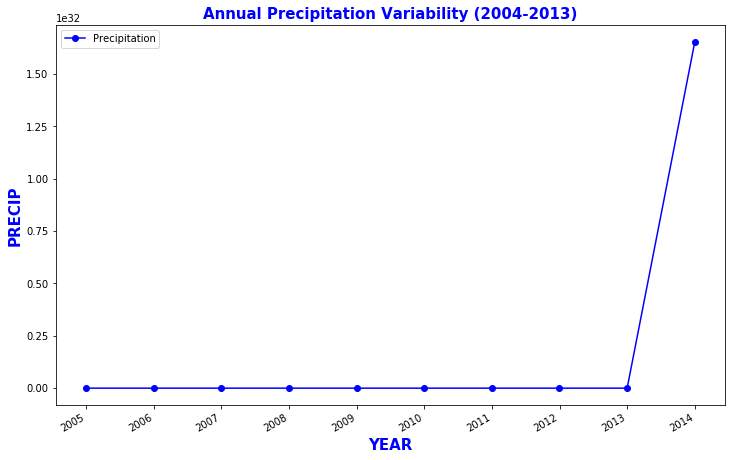

In [16]:
fig, ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_totals.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='Precipitation')
ax.set_title('Annual Precipitation Variability (2004-2013)',fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

In [17]:
brazi = xr.open_mfdataset('/home/benedict/brazil/*.nc')
brazi

<xarray.Dataset>
Dimensions:   (lon: 168, lat: 159, datetime: 5114)
Coordinates:
  * lon       (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat       (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2016-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 159, 168), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [18]:
brazi_precip1 = brazi['precip']
brazi_precip1

<xarray.DataArray 'precip' (datetime: 5114, lat: 159, lon: 168)>
dask.array<concatenate, shape=(5114, 159, 168), dtype=float32, chunksize=(366, 159, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat       (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2016-12-31
Attributes:
    grid_mapping:  crs

In [19]:
ds = brazi_precip1
dry_days_per_year = (ds < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year

<xarray.DataArray 'precip' (year: 14, lat: 159, lon: 168)>
dask.array<stack, shape=(14, 159, 168), dtype=int64, chunksize=(1, 159, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat      (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * year     (year) int64 2003 2004 2005 2006 2007 ... 2012 2013 2014 2015 2016

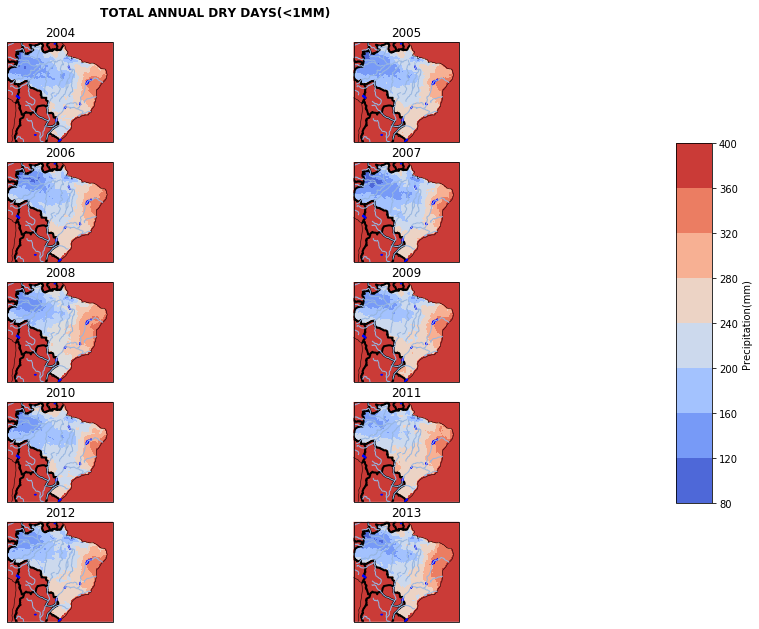

In [23]:
fig,ax=plt.subplots(5,2,figsize=(20,10),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-73.50,-32.5,-33.50,5.25], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_year.lon,dry_days_per_year.lat,dry_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS(<1MM)', fontweight='bold');


In [22]:
ws = brazi_precip1
wet_days_per_year = (ws >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year

<xarray.DataArray 'precip' (year: 14, lat: 159, lon: 168)>
dask.array<stack, shape=(14, 159, 168), dtype=int64, chunksize=(1, 159, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat      (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * year     (year) int64 2003 2004 2005 2006 2007 ... 2012 2013 2014 2015 2016

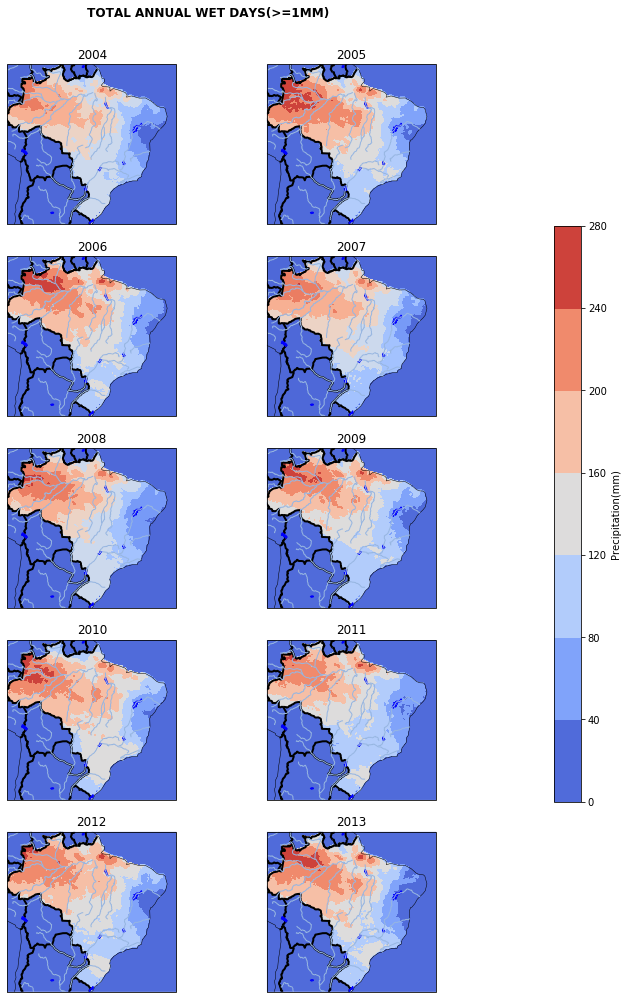

In [27]:
fig,ax=plt.subplots(5,2,figsize=(15,16),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-73.50,-32.5,-33.50,5.25], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year.lon,wet_days_per_year.lat,wet_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS(>=1MM)', fontweight='bold');

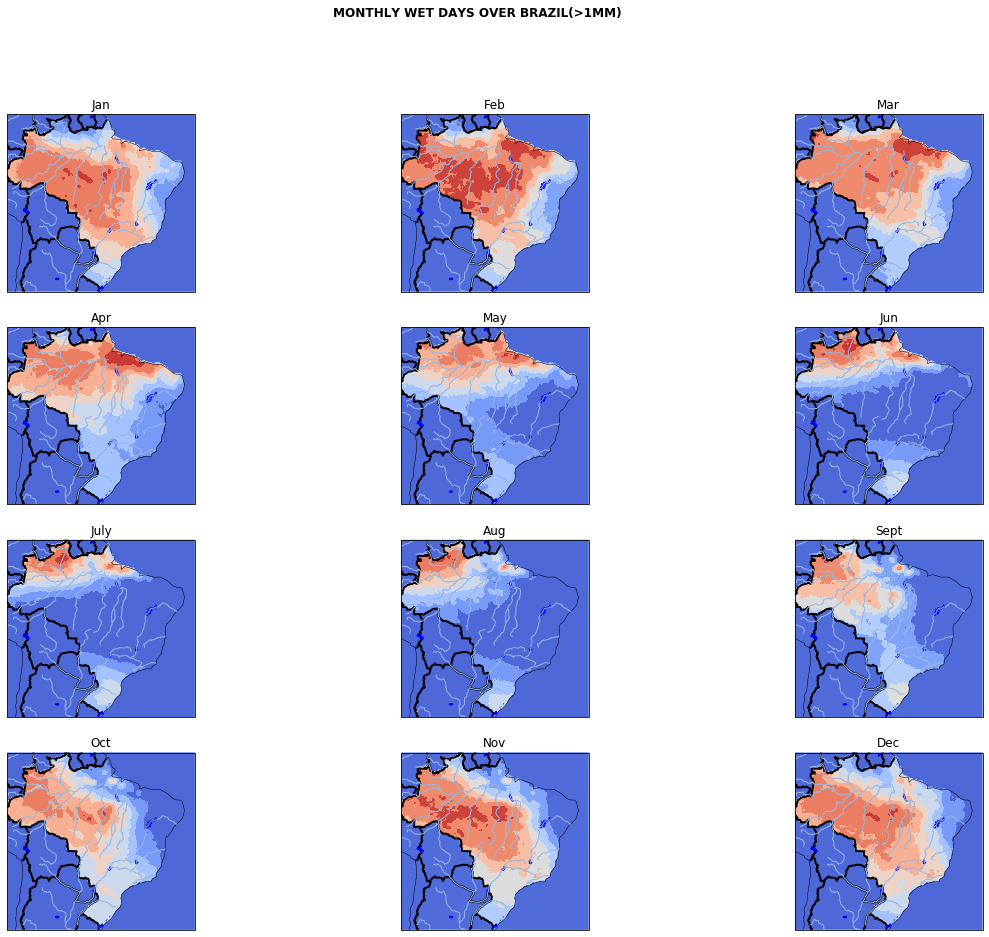

In [36]:
wet_days_per_month1= (ws>1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1fig,ax=plt.subplots(4,3,figsize=(20,15),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-73.50,-32.5,-33.50,5.25], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER BRAZIL(>1MM)', fontweight='bold');

In [37]:
dry_days_per_month2= (ds<1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 159, lon: 168)>
dask.array<stack, shape=(12, 159, 168), dtype=int64, chunksize=(1, 159, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat      (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

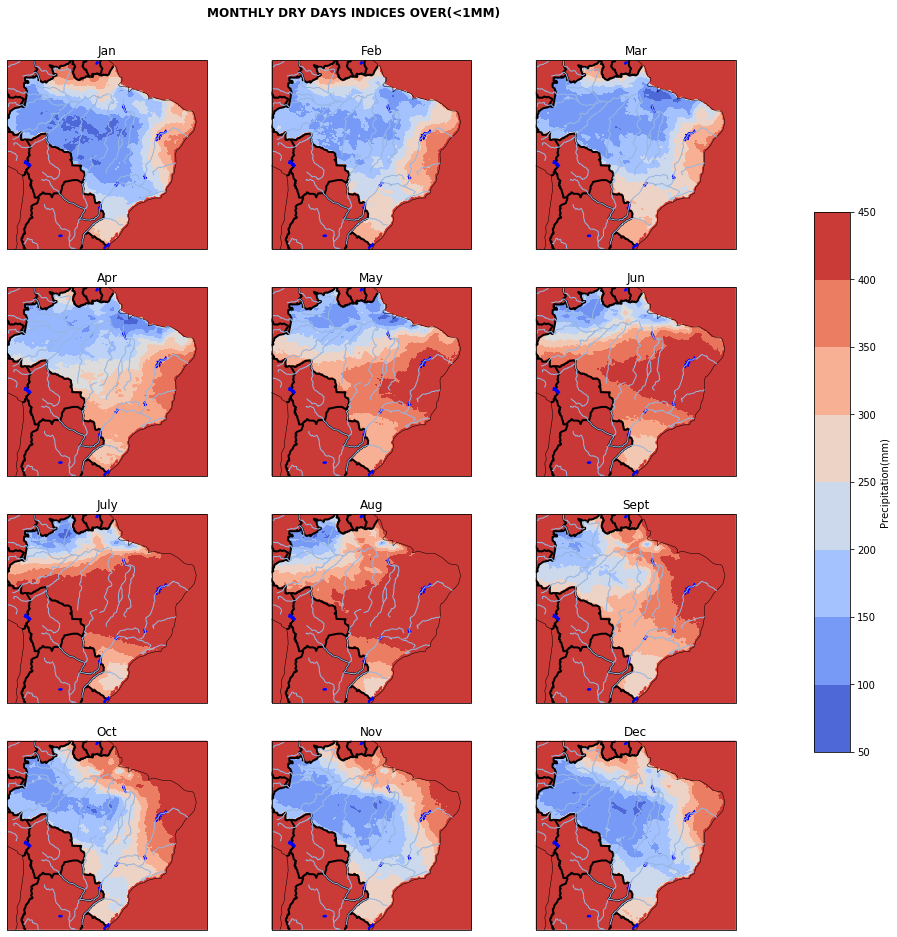

In [38]:
fig,ax=plt.subplots(4,3,figsize=(20,15),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-73.50,-32.5,-33.50,5.25], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_month2.lon,dry_days_per_month2.lat,dry_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(<1MM)', fontweight='bold');

In [39]:
wet_days_per_year1 = (ws>10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year1

<xarray.DataArray 'precip' (year: 14, lat: 159, lon: 168)>
dask.array<stack, shape=(14, 159, 168), dtype=int64, chunksize=(1, 159, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat      (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * year     (year) int64 2003 2004 2005 2006 2007 ... 2012 2013 2014 2015 2016

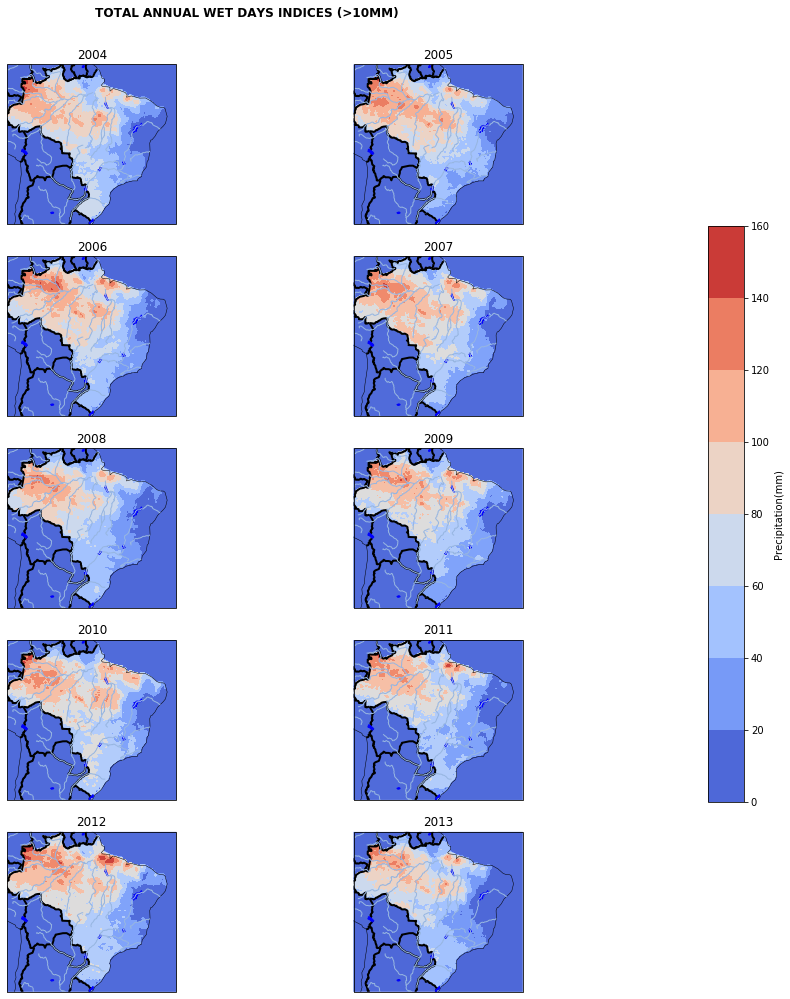

In [57]:
fig,ax=plt.subplots(5,2,figsize=(20,16),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-73.50,-32.5,-33.50,5.25], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year1.lon,wet_days_per_year1.lat,wet_days_per_year1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>10MM)', fontweight='bold');

In [59]:
wet_days_per_year2 = (ws>20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year2

<xarray.DataArray 'precip' (year: 14, lat: 159, lon: 168)>
dask.array<stack, shape=(14, 159, 168), dtype=int64, chunksize=(1, 159, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat      (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * year     (year) int64 2003 2004 2005 2006 2007 ... 2012 2013 2014 2015 2016

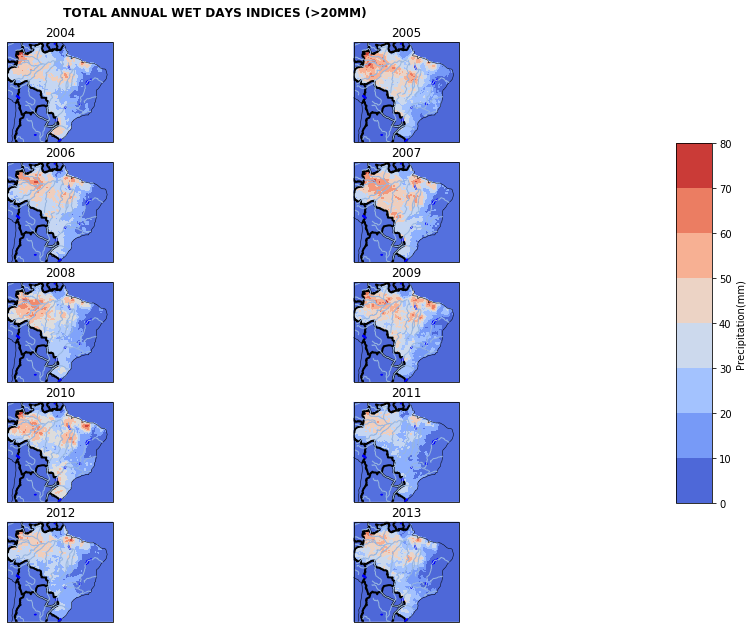

In [60]:
fig,ax=plt.subplots(5,2,figsize=(20,10),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-73.50,-32.5,-33.50,5.25], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon,wet_days_per_year2.lat,wet_days_per_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>20MM)', fontweight='bold');

In [61]:
brazil = xr.open_mfdataset('/home/benedict/brazil/*.nc')
brazil

<xarray.Dataset>
Dimensions:   (lon: 168, lat: 159, datetime: 5114)
Coordinates:
  * lon       (lon) float32 -74.0 -73.75 -73.5 -73.25 ... -32.75 -32.5 -32.25
  * lat       (lat) float32 5.75 5.5 5.25 5.0 4.75 ... -33.0 -33.25 -33.5 -33.75
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2016-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 159, 168), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [62]:
brazil_data = brazil.sel(datetime=slice("2004","2013"),lon=(-52.25),lat=(-17.00))
brazil_data

<xarray.Dataset>
Dimensions:   (datetime: 3653)
Coordinates:
    lon       float32 -52.25
    lat       float32 -17.0
  * datetime  (datetime) datetime64[ns] 2004-01-01 2004-01-02 ... 2013-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(366,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [63]:
dry_days_annual = (brazil_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (brazil_data['precip']>=1).resample(datetime='1Y').sum()

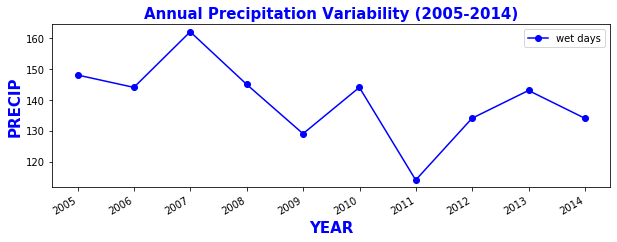

In [65]:
wet_days_annual = (brazil_data['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_annual.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Annual Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='blue')
plt.legend()
plt.show()

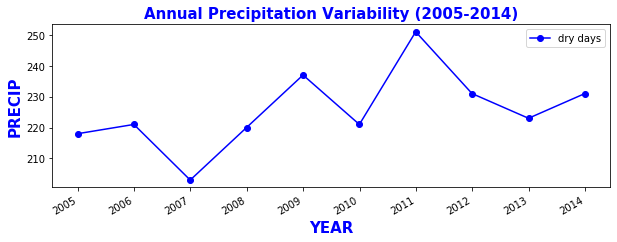

In [66]:
dry_days_annual = (brazil_data['precip']< 1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_annual.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='dry days')
ax.set_title('Annual Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='blue')
plt.legend()
plt.show()

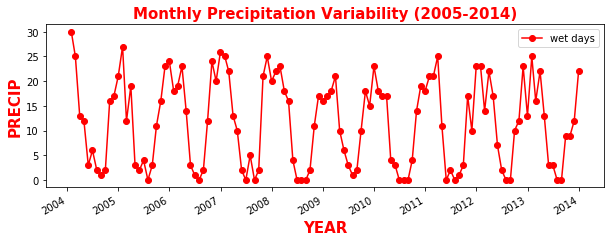

In [67]:
wet_days_monthly = (brazil_data['precip']>=1).resample(datetime='1M').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Monthly Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='red')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='red')
plt.legend()
plt.show()

In [68]:
dry_days_annual = (brazil_data['precip']< 1).resample(datetime='1Y').sum()
wet_days_annual = (brazil_data['precip']>=1).resample(datetime='1Y').sum()

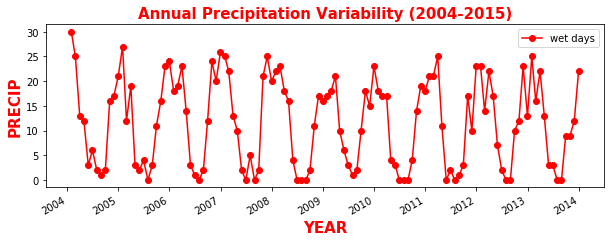

In [69]:
wet_days_annual = (brazil_data['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Annual Precipitation Variability (2004-2014)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='red')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color='red')
plt.legend()
plt.show()

In [70]:
extreme_10 = brazil_data.where(brazil_data > 10).groupby('datetime.year').count('datetime')
extreme_10

<xarray.Dataset>
Dimensions:  (year: 10)
Coordinates:
    lon      float32 -52.25
    lat      float32 -17.0
  * year     (year) int64 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
Data variables:
    crs      (year) int64 0 0 0 0 0 0 0 0 0 0
    precip   (year) int64 dask.array<chunksize=(1,), meta=np.ndarray>

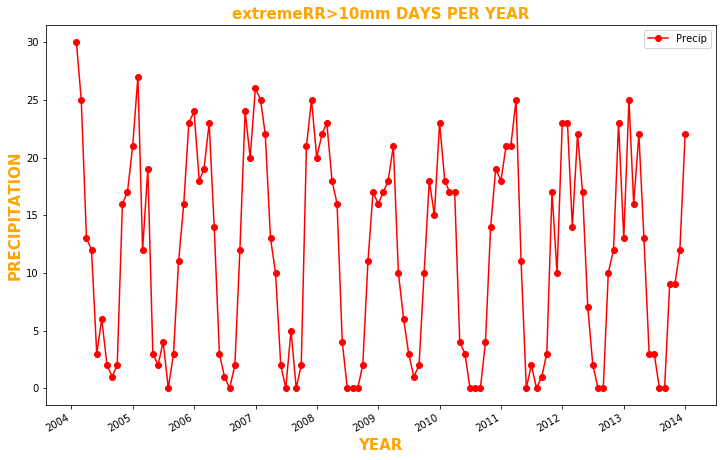

In [73]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='Precip')
ax.set_title('extremeRR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
#plt.savefig('10.jpeg');

In [74]:
extreme_20 = brazil_data.where(brazil_data > 10).groupby('datetime.year').count('datetime')
extreme_20

<xarray.Dataset>
Dimensions:  (year: 10)
Coordinates:
    lon      float32 -52.25
    lat      float32 -17.0
  * year     (year) int64 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
Data variables:
    crs      (year) int64 0 0 0 0 0 0 0 0 0 0
    precip   (year) int64 dask.array<chunksize=(1,), meta=np.ndarray>

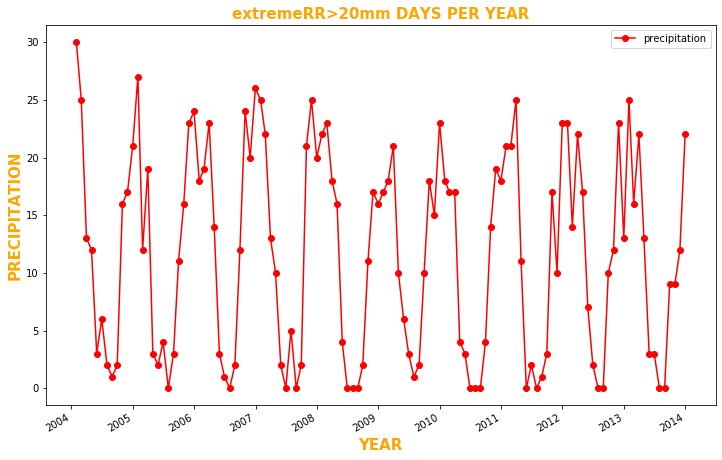

In [75]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='precipitation')
ax.set_title('extremeRR>20mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'Orange')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 15, color= 'Orange')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15, color= 'Orange')
plt.legend()
# plt.show()
#plt.savefig('10.jpeg');